In [15]:
import numpy as np
import matplotlib.pyplot as plt
import eleanor
import lightkurve as lk
import copy
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
star = eleanor.Source(tic=120362128, sector=14, tc=True)

In [72]:
data = eleanor.TargetData(star, height=15, width=15, do_pca=True, do_psf=False)

In [18]:
sc = lk.search_targetpixelfile(target='tic120362128', sector=14).download()
sq = sc.quality < 5000
start = 2500
end = 3400

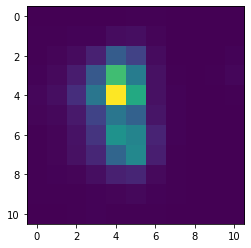

In [47]:
plt.imshow(sc.flux[sq][start:end].value[5])

In [108]:
sc.flux_err[sq][start:end].shape

(900, 11, 11)

In [103]:
data = eleanor.TargetData(star, height=15, width=15, do_pca=True, do_psf=False)
data.psf_lightcurve(data_arr = sc.flux[sq][start:end], err_arr = sc.flux_err[sq][start:end], 
                        bkg_arr=sc.flux_bkg[sq,0,0][start:end], model_name="Gaussian", verbose=True, nstars=3, xc=[4.9, 4.5, 4.7], yc=[3.0, 4.4, 7.0], ignore_pixels=1, likelihood="gaussian")

  0%|          | 0/900 [00:00<?, ?it/s]PSF optimum found [ 9.38185747e+00 -8.79314649e-02  7.17762325e+00  7.75112211e-04
 -9.92660059e-03 -9.99999062e-03  5.26076670e-05 -9.03681915e-03
 -4.53747965e-03]
100%|██████████| 900/900 [02:04<00:00,  7.23it/s]


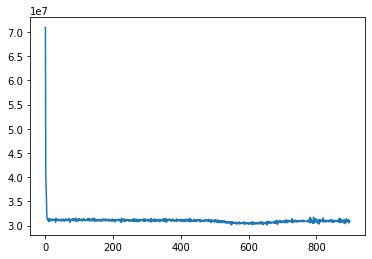

In [104]:
plt.plot(data.psf_ll)

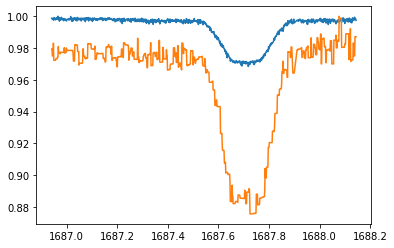

In [106]:
start_real = start+50
time = sc.time[sq][start_real:end]
photometry_flux = sc.to_lightcurve().flux[sq][start_real:end].value
plt.plot(time.value, photometry_flux / np.max(photometry_flux), label='aperture photometry')
psf_flux = data.all_psf[:,0]
plt.plot(time.value, psf_flux[start_real-start:end-start] / np.max(psf_flux[start_real-start:end-start]))

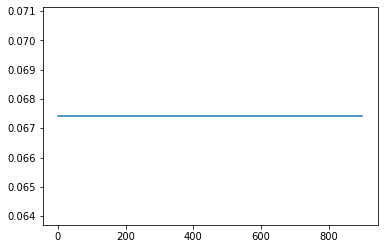

In [97]:
plt.plot(data.psf_params[:,-1])

In [98]:
print(lk.estimate_cdpp(photometry_flux, transit_duration=1))
print(lk.estimate_cdpp(psf_flux, transit_duration=1))

770.4013129712878 ppm
4023.540741255636 ppm
